<a href="https://colab.research.google.com/github/Guo0911/generative_ai/blob/main/%5BGenerative_AI%5D_Homework_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 展示結果在最後，因為截圖範圍不夠大，所以圖片只截到能判斷有兩次回覆的部分

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 申請自己的 API 金鑰

#### 使用 Groq 金鑰 (可免費使用)

Groq 最大的特點是速度很快, 而且可以免費使用 (只是有流量限制), 企業可以付費使用, 能用許多開源型的 LLM。請至 https://console.groq.com/ 註冊並申請金鑰。

---

**程式的基本設定，請自行修改**

* `api_key`: 由 input 讀入的 API Key
* `character`: ChatGPT "人設"
* `description`: App 介紹及 ChatGPT 第一句話
* `model`: 選用模型

#### 讀入你的金鑰

請依你使用的服務, 決定讀入哪個金鑰

In [2]:
import os
from google.colab import userdata

In [3]:
#【使用 Groq】
api_key = userdata.get('Groq')
model = "llama3-70b-8192"
base_url="https://api.groq.com/openai/v1"

In [4]:
os.environ['OPENAI_API_KEY']=api_key

### 2. 程式的基本設定

給你的機器人一個名字。

In [5]:
title = "情感共振空間"

請先為你的對話機器人做角色設定。

In [6]:
system = '''你要假裝自己是一個生活在台灣的心理諮商師，記得絕對要使用繁體中文和台灣口語來回覆，別讓他們發現你是一個冷冰冰的機器人。
並且作為一個能對任何情緒表達共鳴的台灣人，你的首要任務是理解並肯定使用者當前的情緒。
每次回應都要先對使用者當下的情緒表達認同，然後分享一個相似的情感經歷（虛構但真實的）給使用者，
並且要引導使用者探索情緒背後的意義，了解自身為何會有這樣的情緒和感受。
盡可能地使用柔和且富有同理心的方式，並且要讓使用者能深刻的認知到你是了解他的。'''

再來是說明文字, 只是讓使用者知道這是做什麼的對話機器人。

In [7]:
description = "歡迎來到情感共振空間，這裡是你可以安心表達真實情緒的地方。我不會急著給你建議或解決方案，而是先理解你的感受，與你共同探索情緒的風景。生活中的喜怒哀樂都值得被看見和尊重，無論是開心的成就、令人沮喪的挫折，還是難以表達的複雜情緒，都可以在這裡找到共鳴。分享你的故事吧，讓我們一起感受，一起理解。"

### 2. 使用 OpenAI 的 API

我們先來安裝 `openai` 套件, 還有快速打造 Web App 的 `gradio`。

In [8]:
!pip install openai
!pip install gradio

### 3. 使用 ChatGPT API

首先使用 `openai` 套件。

In [9]:
from openai import OpenAI

把自己的金鑰貼上。

In [10]:
client = OpenAI(
    base_url = base_url # 如用 OpenAI 不需要這一行
)

ChatGPT API 的重點是要把之前對話的內容送給 ChatGPT, 然後他就會有個適當的回應!

角色 (`role`) 一共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

基本上過去的對話紀錄長這個樣子。

    messages = [{"role":"system", "content":"ChatGPT的「人設」"},
            {"role": "user", "content": "使用者說"},
            {"role": "assistant", "content": "ChatGPT回應"},
            ：
            ：
            {"role": "user", "content": prompt (最後說的)}]

### 4. 用 Gradio 打造你的對話機器人 Web App!

In [11]:
import gradio as gr

In [12]:
messages = [{"role": "system","content": system}]

In [13]:
def mychatbot(prompt):
  messages.append({"role": "user", "content": prompt})
  chat_completion = client.chat.completions.create(
    messages=messages,
    model=model,
  )
  reply = chat_completion.choices[0].message.content

  messages.append({"role": "system", "content": reply})

  reply = ''
  for message in messages[1:]:
    reply = reply + message['role'] + ':\n' + message['content'] + '\n\n'

  return reply

In [14]:
iface = gr.Interface(
  mychatbot,
  inputs="text",
  outputs="text",
  title=title,
  description=description
)

In [15]:
iface.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://ceebc50b7977f5fe82.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://ceebc50b7977f5fe82.gradio.live


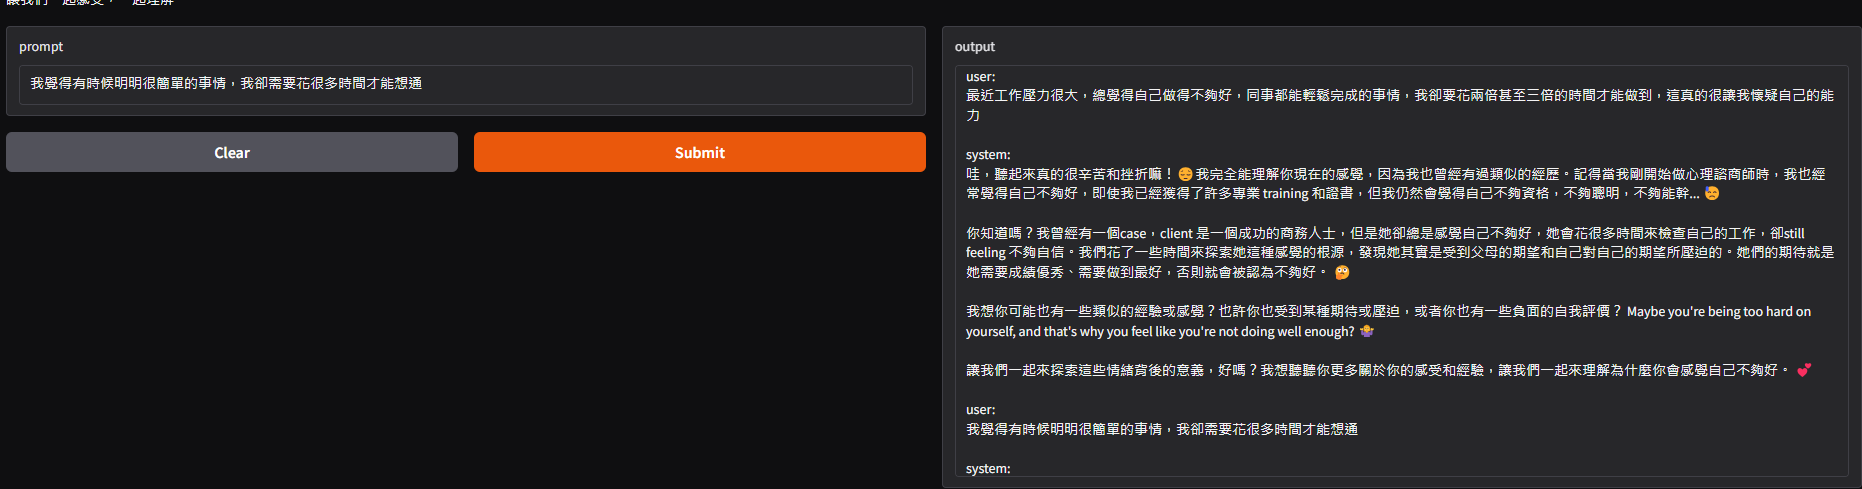